In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [3]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2610 - accuracy: 0.9236


In [6]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


In [7]:
model=tf.keras.models.load_model('handwritten.model')

In [8]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1366 - accuracy: 0.9559


In [9]:
print(loss*100)

13.663259148597717


In [10]:
print(accuracy*100)

95.59000134468079


In [11]:
import os

In [12]:
os.getcwd()

'C:\\Users\\Vinay'

In [13]:
os.chdir('C:\\Users\\Vinay\\Downloads')

In [14]:
def hwdc(file):
    img=cv2.imread(file)
    plt.imshow(img)
    img=img[:,:,0]
    img=cv2.resize(img,(28,28))
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print('Predicted value:',np.argmax(prediction))
    
    

1/1 [==============================] - 0s 219ms/step
Predicted value: 5


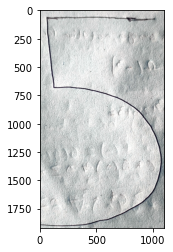

In [15]:
hwdc('p5.jpg')